What are convolution networks?
What is Mnist data?
Links
https://keras.io/getting-started/sequential-model-guide/
https://elitedatascience.com/keras-tutorial-deep-learning-in-python


In [1]:
import os
# uncomment the following line to run only on CPU
# restart the Jupyter notebook before each change
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

# On the p2.xlarge
# CPU: 163 seconds, GPU: 12 seconds for each epoch

In [2]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

from sklearn.metrics import confusion_matrix

import pandas as pd
import seaborn as sns

Using TensorFlow backend.
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [3]:
K.image_data_format()

'channels_last'

In [4]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9144829485596197654
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11324823962
locality {
  bus_id: 1
}
incarnation: 13031363997829171269
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:1e.0, compute capability: 3.7"
]


In [5]:
def plot_gray_image(img, title, ax):
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.imshow(img, cmap=cm.gray)
    ax.set_title(title)

In [6]:
num_classes = 10

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')

print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [7]:
# convert class vectors to binary class matrices
y_train_bin = keras.utils.to_categorical(y_train, num_classes)
y_test_bin = keras.utils.to_categorical(y_test, num_classes)

In [8]:
batch_size = 128
epochs = 10

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train_bin,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test_bin))
score = model.evaluate(x_test, y_test_bin, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 12s 194us/step - loss: 0.3580 - acc: 0.8899 - val_loss: 0.0857 - val_acc: 0.9734
Epoch 2/10
60000/60000 [==============================] - 10s 171us/step - loss: 0.1238 - acc: 0.9634 - val_loss: 0.0563 - val_acc: 0.9824
Epoch 3/10
60000/60000 [==============================] - 10s 172us/step - loss: 0.0935 - acc: 0.9720 - val_loss: 0.0477 - val_acc: 0.9849
Epoch 4/10
60000/60000 [==============================] - 10s 171us/step - loss: 0.0764 - acc: 0.9777 - val_loss: 0.0421 - val_acc: 0.9860
Epoch 5/10
60000/60000 [==============================] - 10s 172us/step - loss: 0.0674 - acc: 0.9803 - val_loss: 0.0398 - val_acc: 0.9874
Epoch 6/10
60000/60000 [==============================] - 10s 171us/step - loss: 0.0603 - acc: 0.9821 - val_loss: 0.0376 - val_acc: 0.9870
Epoch 7/10
60000/60000 [==============================] - 10s 171us/step - loss: 0.0547 - acc: 0.9837 - val_loss: 0.

In [9]:
y_predict = model.predict_classes(x_test)

10000/10000 [==============================] - 1s 105us/step


In [10]:
err_idx = np.where(y_test != y_predict)[0]

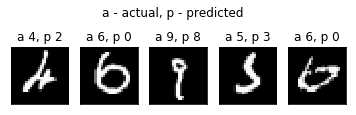

In [11]:
err_plot_size = 5
fig, ax_list = plt.subplots(nrows=1, ncols=err_plot_size)
fig.set_size_inches(w=6, h=2)
fig.suptitle('a - actual, p - predicted')
for idx, ax in enumerate(ax_list):
    data_idx = err_idx[idx]
    msg = 'a {}, p {}'.format(y_test[data_idx], y_predict[data_idx])
    plot_gray_image(x_test[data_idx].squeeze(), msg, ax)

In [12]:
cmatrix = confusion_matrix(y_test, y_predict)
df_cm = pd.DataFrame(cmatrix)
df_cm

,0,1,2,3,4,5,6,7,8,9
0,977,0,1,0,0,0,0,1,1,0
1,0,1123,7,0,0,1,2,0,2,0
2,2,0,1028,0,0,0,0,2,0,0
3,0,0,3,1003,0,2,0,1,1,0
4,0,0,2,0,966,0,3,0,2,9
5,2,0,0,5,0,881,3,0,0,1
6,6,2,0,1,1,3,944,0,1,0
7,1,2,10,1,0,0,0,1011,1,2
8,5,0,2,1,0,0,0,0,965,1
9,1,1,0,1,1,3,1,0,4,997


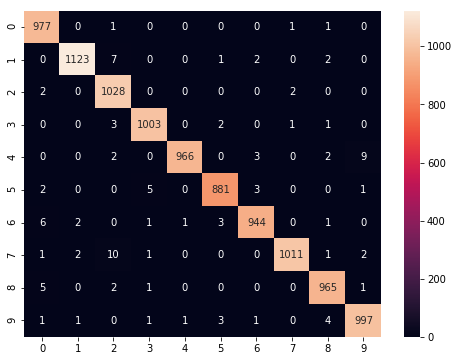

In [13]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(df_cm, annot=True, fmt='.0f', ax=ax)

Add confusion matrix
* https://blog.plon.io/tutorials/cifar-10-classification-using-keras-tutorial/

Measuring performance
* https://machinelearningmastery.com/custom-metrics-deep-learning-keras-python/
* https://machinelearningmastery.com/evaluate-performance-deep-learning-models-keras/

Mnist with CNN
* https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/